In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

# Add the src directory to the path
sys.path.append(str(Path.cwd().parent / 'src'))

# Import our visualization functions
from visualization.plots import *

# Set style
set_style()

In [2]:
# Load the engineered data
project_root = Path.cwd().parent
data_path = project_root / 'data' / 'processed' / 'hr_dataset_engineered.csv'

print(f"Loading data!!")
df = pd.read_csv(data_path)
print("Data loaded successfully!")
print(f"Dataset shape: {df.shape}")

Loading data!!
Data loaded successfully!
Dataset shape: (1952, 17)


In [3]:
# Overview of the data
print("Dataset Overview:")
print("=" * 50)
display(df.head())

print("\nData Types:")
print("=" * 50)
print(df.dtypes)

print("\nMissing Values:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})
display(missing_df[missing_df['Missing Values'] > 0])

Dataset Overview:


,EmployeeID,Name,Department,Gender,JobRole,Education,Age,Salary,Bonus,Attrition,TotalCompensation,SalaryBonusRatio,AgeSquared,DeptSalaryRatio,RoleSalaryRatio,AttritionFlag,TotalCompensationCalculated
0,1001,Emp_1,Sales,Male,Manager,High School,39,10.577452,6909,No,46148.0,5.678582,1521,0.956353,0.957888,0,6919.577452
1,1002,Emp_2,Marketing,Male,Consultant,Masters,53,10.322757,17150,No,47566.0,1.773424,2809,0.936596,0.937364,0,17160.322757
2,1003,Emp_3,It,Female,Executive,High School,24,10.061047,28602,No,52014.0,0.818516,576,0.909101,0.911663,0,28612.061047
3,1004,Emp_4,Marketing,Female,Engineer,Masters,23,11.532503,5080,No,107056.0,20.070065,529,1.046358,1.044158,0,5091.532503
4,1005,Emp_5,Marketing,Male,Executive,Phd,54,10.701152,7083,No,51489.0,6.268492,2916,0.970928,0.969665,0,7093.701152



Data Types:
EmployeeID                       int64
Name                            object
Department                      object
Gender                          object
JobRole                         object
Education                       object
Age                              int64
Salary                         float64
Bonus                            int64
Attrition                       object
TotalCompensation              float64
SalaryBonusRatio               float64
AgeSquared                       int64
DeptSalaryRatio                float64
RoleSalaryRatio                float64
AttritionFlag                    int64
TotalCompensationCalculated    float64
dtype: object

Missing Values:


,Missing Values,Percentage
Gender,39,1.997951
Attrition,40,2.049180


In [4]:
# Attrition overview
print("Attrition Distribution:")
print("=" * 50)
attrition_counts = df['Attrition'].value_counts()
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100

attrition_df = pd.DataFrame({
    'Count': attrition_counts,
    'Percentage': attrition_percent
})
display(attrition_df)

Attrition Distribution:


,Count,Percentage
Attrition,,
No,1525,79.759414
Yes,387,20.240586


Attrition by Department:


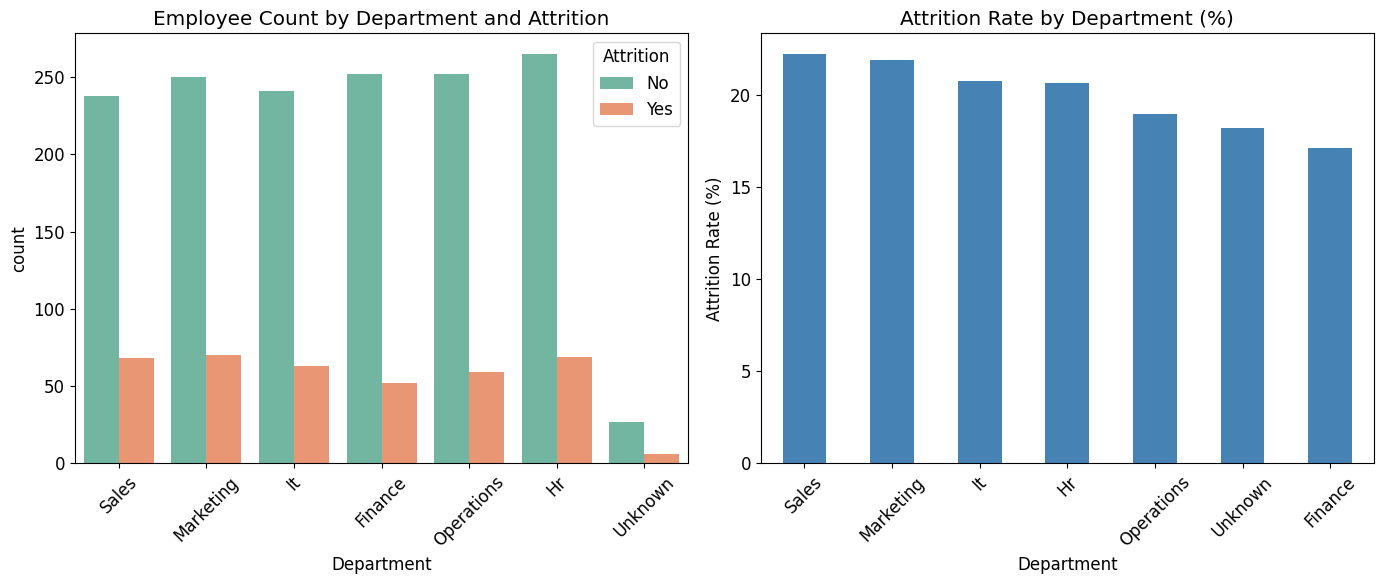

In [5]:
# Attrition by department
print("Attrition by Department:")
print("=" * 50)
fig = plot_attrition_by_department(df, save_path=project_root / 'notebooks' / 'outputs' / 'attrition_by_department.png')
plt.show()

Attrition by Gender:


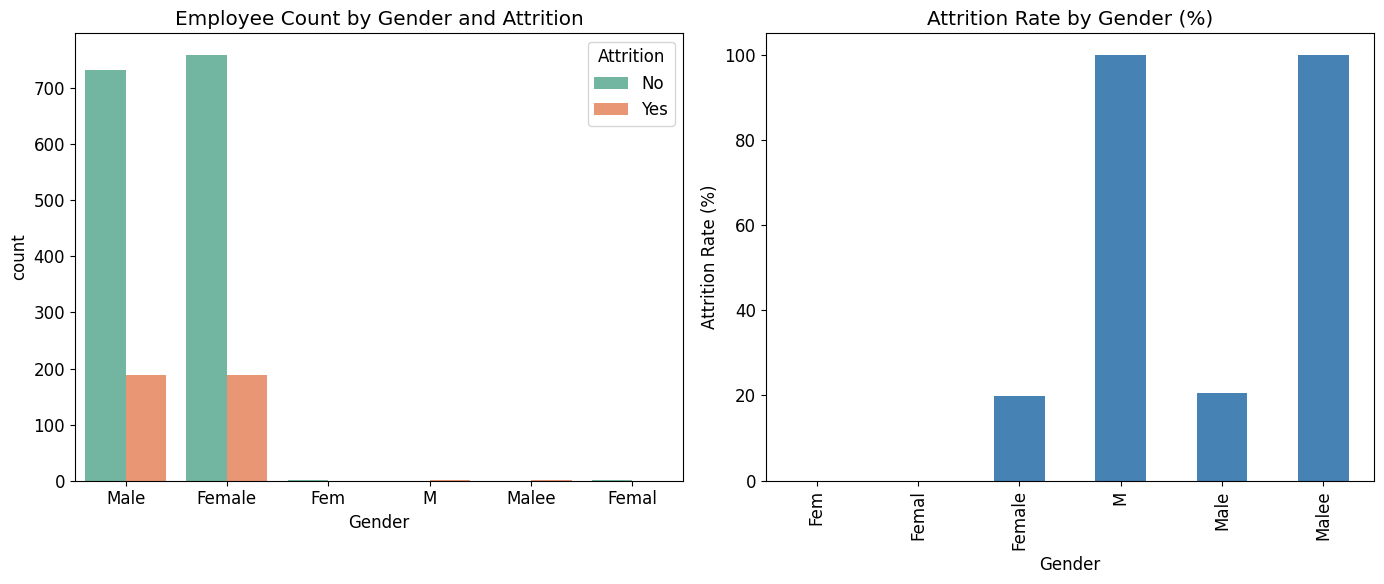

In [6]:
# Attrition by gender
print("Attrition by Gender:")
print("=" * 50)
fig = plot_attrition_by_gender(df, save_path=project_root / 'notebooks' / 'outputs' / 'attrition_by_gender.png')
plt.show()

Salary vs Attrition Analysis:


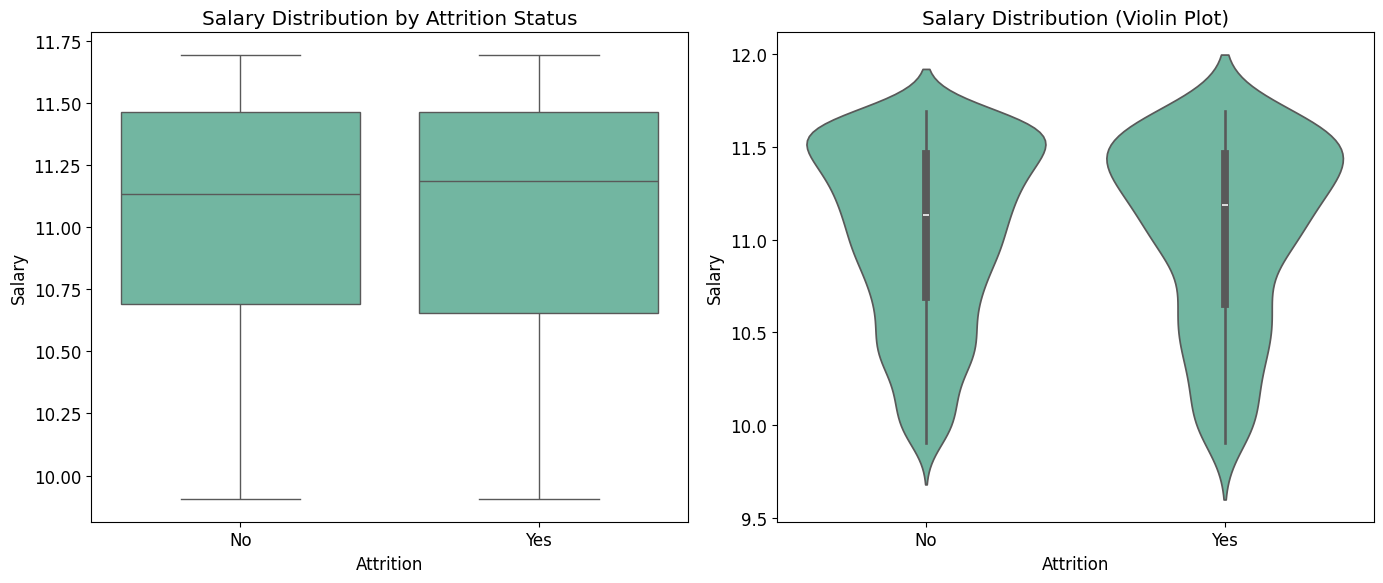

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1525.0,11.041294,0.488312,9.905386,10.691445,11.133990,11.462874,11.695097
Yes,387.0,11.047050,0.502207,9.903638,10.654278,11.187265,11.463494,11.692953


In [7]:
# Salary analysis
print("Salary vs Attrition Analysis:")
print("=" * 50)
fig = plot_salary_vs_attrition(df, save_path=project_root / 'notebooks' / 'outputs' / 'salary_vs_attrition.png')
plt.show()

# Display salary statistics by attrition
salary_stats = df.groupby('Attrition')['Salary'].describe()
display(salary_stats)

Age vs Attrition Analysis:


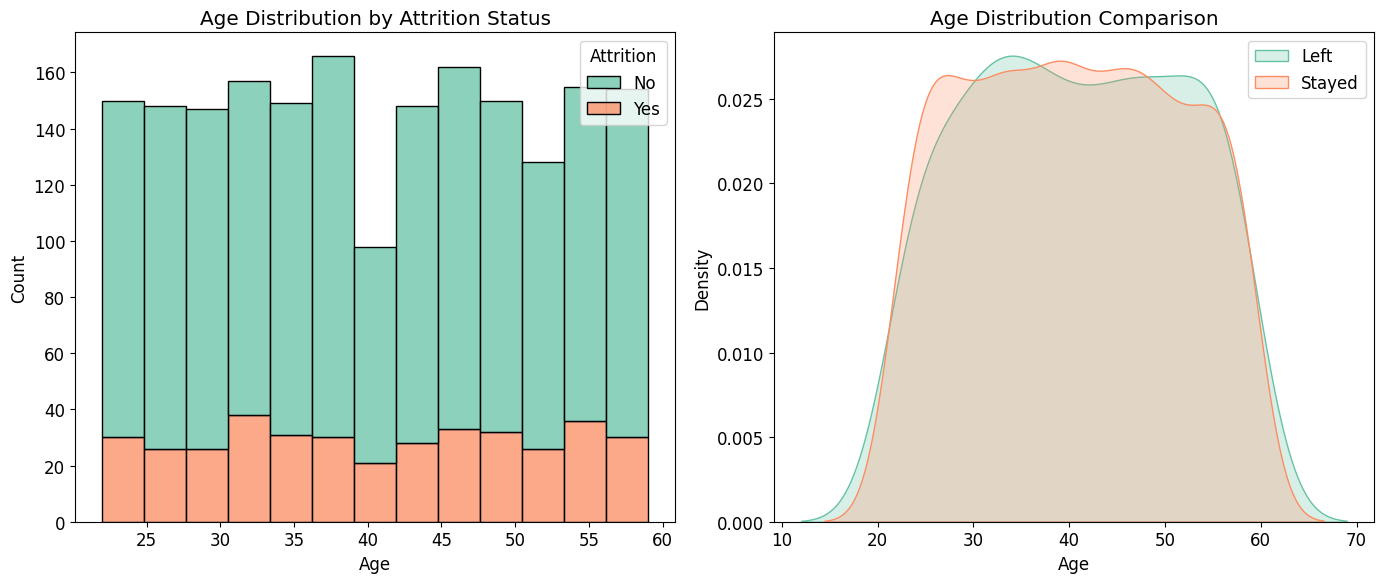

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1525.0,40.398689,10.907076,22.0,31.0,40.0,50.0,59.0
Yes,387.0,40.790698,10.942389,22.0,32.0,41.0,50.0,59.0


In [8]:
# Age analysis
print("Age vs Attrition Analysis:")
print("=" * 50)
fig = plot_age_vs_attrition(df, save_path=project_root / 'notebooks' / 'outputs' / 'age_vs_attrition.png')
plt.show()

# Display age statistics by attrition
age_stats = df.groupby('Attrition')['Age'].describe()
display(age_stats)

Education vs Attrition Analysis:


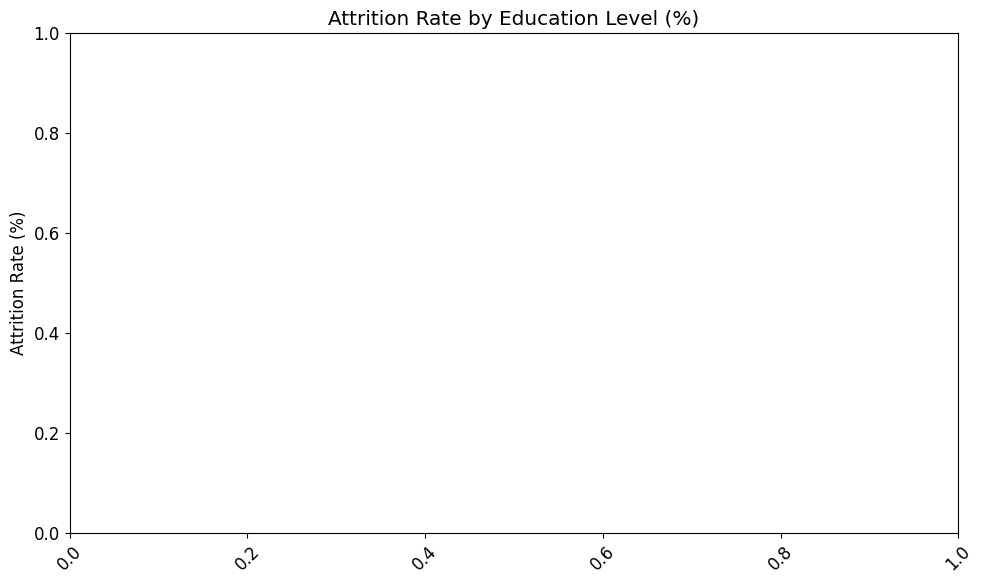

In [9]:
# Education analysis
print("Education vs Attrition Analysis:")
print("=" * 50)
fig = plot_education_attrition(df, save_path=project_root / 'notebooks' / 'outputs' / 'education_vs_attrition.png')
plt.show()

Job Role Analysis:


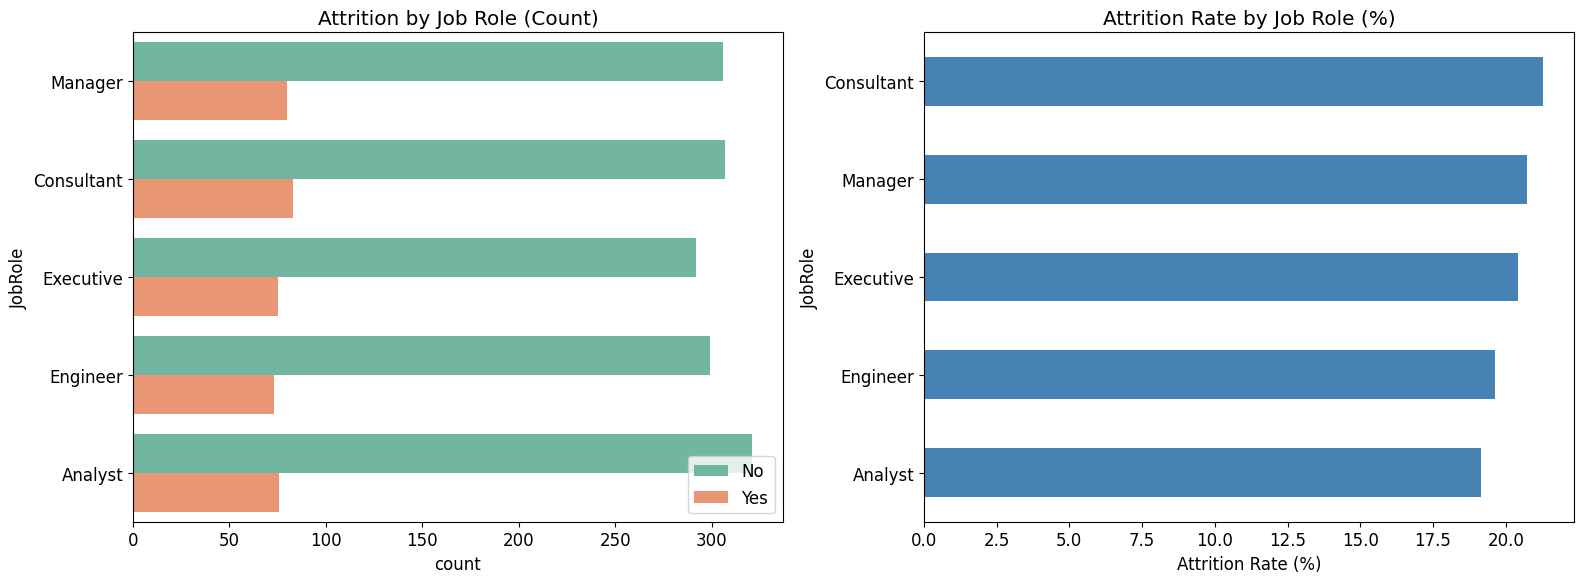

In [10]:
# Job role analysis
print("Job Role Analysis:")
print("=" * 50)
fig = plot_jobrole_analysis(df, save_path=project_root / 'notebooks' / 'outputs' / 'jobrole_analysis.png')
plt.show()

Correlation Analysis:


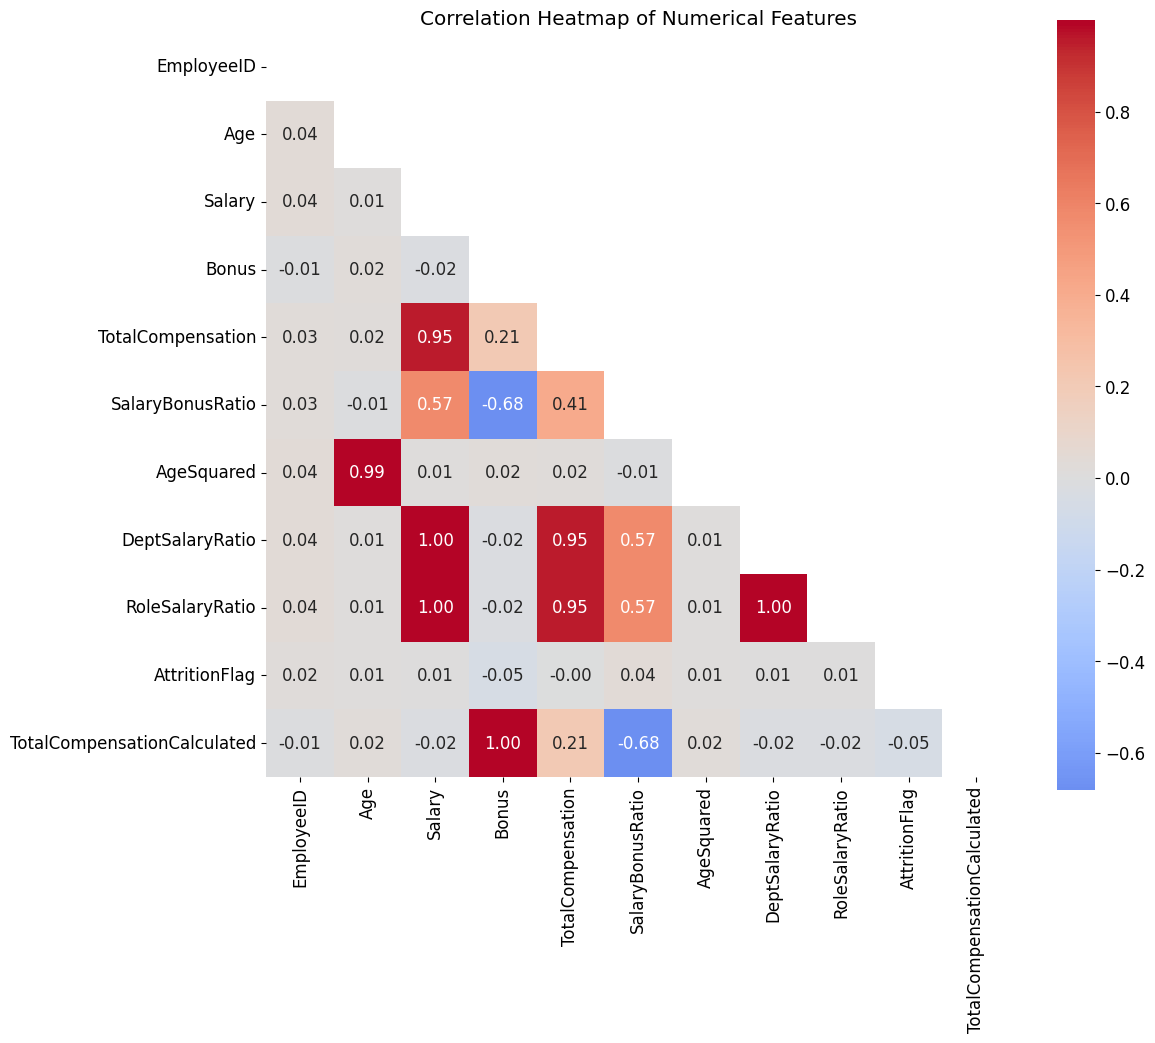

Correlation with Attrition Flag:


,Correlation
AttritionFlag,1.000000
SalaryBonusRatio,0.040088
EmployeeID,0.017535
AgeSquared,0.014768
Age,0.014649
RoleSalaryRatio,0.005826
DeptSalaryRatio,0.005527
Salary,0.005039
TotalCompensation,-0.002673
TotalCompensationCalculated,-0.048406


In [11]:
# Correlation analysis
print("Correlation Analysis:")
print("=" * 50)
fig = plot_correlation_heatmap(df, save_path=project_root / 'notebooks' / 'outputs' / 'correlation_heatmap.png')
plt.show()

# Focus on correlations with attrition flag if it exists
if 'AttritionFlag' in df.columns:
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    attrition_corr = df[numerical_cols].corr()['AttritionFlag'].sort_values(ascending=False)
    
    print("Correlation with Attrition Flag:")
    print("=" * 50)
    display(pd.DataFrame(attrition_corr).rename(columns={'AttritionFlag': 'Correlation'}))

Bonus vs Attrition Analysis:


,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1525.0,17829.716066,7231.522382,5011.0,11655.0,18142.0,23895.0,29976.0
Yes,387.0,16951.886305,7221.962972,5036.0,10537.0,16930.0,22730.5,29918.0


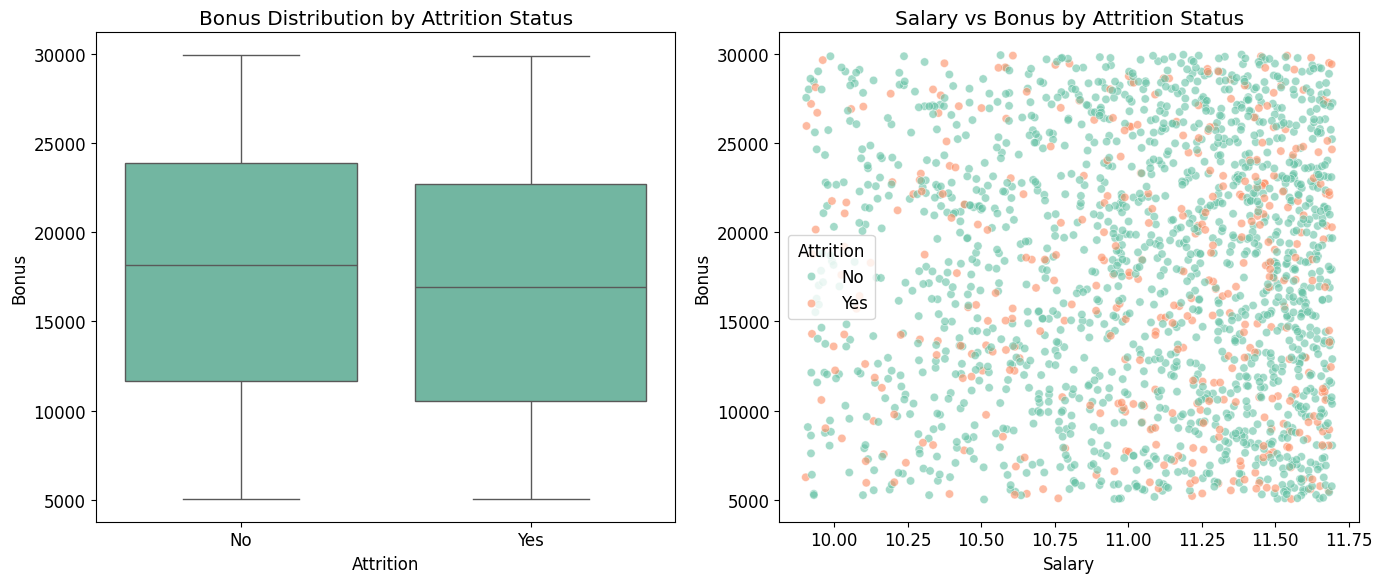

In [12]:
# Bonus analysis
print("Bonus vs Attrition Analysis:")
print("=" * 50)
if 'Bonus' in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Boxplot
    sns.boxplot(data=df, x='Attrition', y='Bonus', ax=ax1)
    ax1.set_title('Bonus Distribution by Attrition Status')
    
    # Calculate bonus statistics
    bonus_stats = df.groupby('Attrition')['Bonus'].describe()
    display(bonus_stats)
    
    # Scatter plot (Bonus vs Salary colored by Attrition)
    if 'Salary' in df.columns:
        sns.scatterplot(data=df, x='Salary', y='Bonus', hue='Attrition', alpha=0.6, ax=ax2)
        ax2.set_title('Salary vs Bonus by Attrition Status')
    
    plt.tight_layout()
    plt.savefig(project_root / 'notebooks' / 'outputs' / 'bonus_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

Department and Salary Analysis:


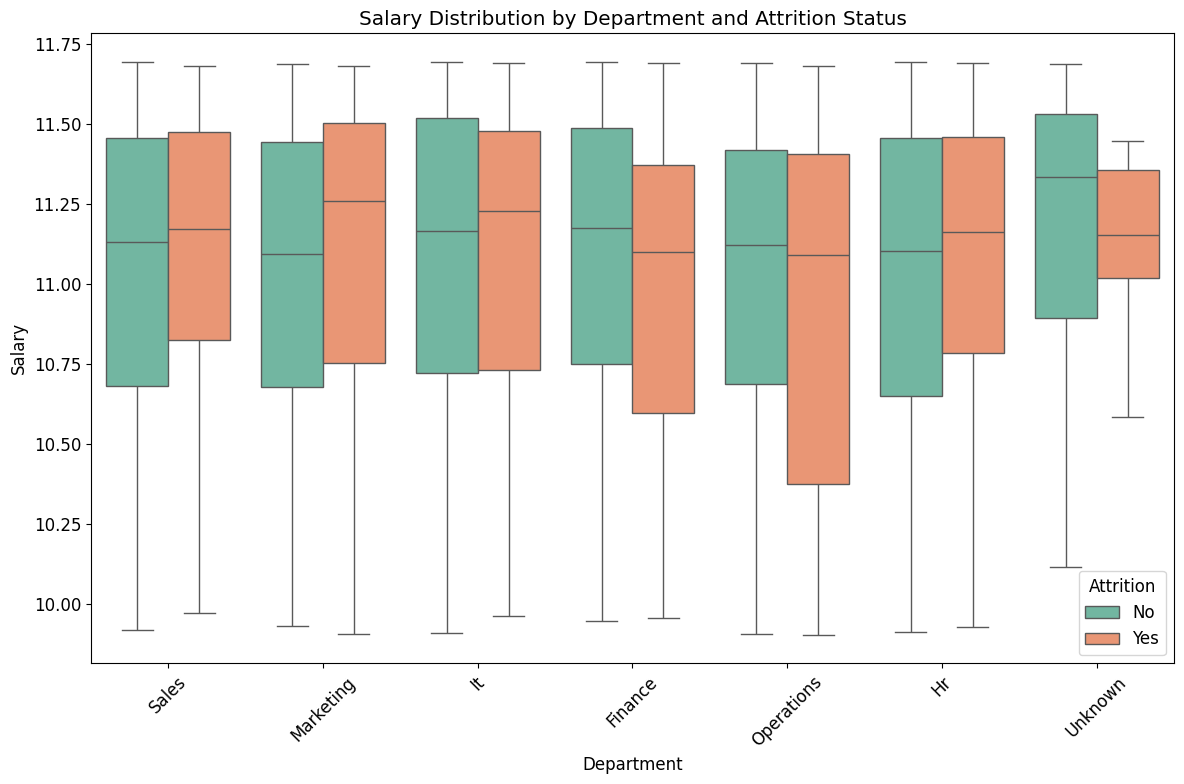

In [13]:
# Department and salary combined analysis
print("Department and Salary Analysis:")
print("=" * 50)
if all(col in df.columns for col in ['Department', 'Salary', 'Attrition']):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create a grouped boxplot
    sns.boxplot(data=df, x='Department', y='Salary', hue='Attrition', ax=ax)
    ax.set_title('Salary Distribution by Department and Attrition Status')
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig(project_root / 'notebooks' / 'outputs' / 'dept_salary_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

In [14]:
# Key insights and summary
print("Key Insights Summary:")
print("=" * 50)

# Calculate key metrics
if 'Attrition' in df.columns:
    overall_attrition_rate = (df['Attrition'] == 'Yes').mean() * 100
    print(f"Overall Attrition Rate: {overall_attrition_rate:.2f}%")

# Find department with highest attrition
if 'Department' in df.columns:
    dept_attrition = df.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100)
    highest_attrition_dept = dept_attrition.idxmax()
    highest_attrition_rate = dept_attrition.max()
    print(f"Department with highest attrition: {highest_attrition_dept} ({highest_attrition_rate:.2f}%)")

# Salary difference between those who left vs stayed
if 'Salary' in df.columns:
    salary_left = df[df['Attrition'] == 'Yes']['Salary'].mean()
    salary_stayed = df[df['Attrition'] == 'No']['Salary'].mean()
    salary_diff = salary_stayed - salary_left
    print(f"Average salary difference (Stayed - Left): ${salary_diff:.2f}")

# Age difference
if 'Age' in df.columns:
    age_left = df[df['Attrition'] == 'Yes']['Age'].mean()
    age_stayed = df[df['Attrition'] == 'No']['Age'].mean()
    age_diff = age_stayed - age_left
    print(f"Average age difference (Stayed - Left): {age_diff:.2f} years")

Key Insights Summary:
Overall Attrition Rate: 19.83%
Department with highest attrition: Sales (21.79%)
Average salary difference (Stayed - Left): $-0.01
Average age difference (Stayed - Left): -0.39 years


In [15]:
# Save summary report
output_path = project_root / 'notebooks' / 'outputs' / 'attrition_analysis_summary.txt'

with open(output_path, 'w') as f:
    f.write("HR ANALYTICS - ATTRITION ANALYSIS SUMMARY\n")
    f.write("="*50 + "\n\n")
    
    f.write(f"Overall Attrition Rate: {overall_attrition_rate:.2f}%\n\n")
    
    f.write("ATTRITION BY DEPARTMENT:\n")
    f.write("-"*30 + "\n")
    for dept, rate in dept_attrition.items():
        f.write(f"{dept}: {rate:.2f}%\n")
    
    f.write(f"\nDepartment with highest attrition: {highest_attrition_dept} ({highest_attrition_rate:.2f}%)\n\n")
    
    f.write("SALARY ANALYSIS:\n")
    f.write("-"*30 + "\n")
    f.write(f"Average salary (Stayed): ${salary_stayed:.2f}\n")
    f.write(f"Average salary (Left): ${salary_left:.2f}\n")
    f.write(f"Difference: ${salary_diff:.2f}\n\n")
    
    f.write("AGE ANALYSIS:\n")
    f.write("-"*30 + "\n")
    f.write(f"Average age (Stayed): {age_stayed:.2f} years\n")
    f.write(f"Average age (Left): {age_left:.2f} years\n")
    f.write(f"Difference: {age_diff:.2f} years\n")

print(f"Summary report saved!!")
print("Attrition analysis completed successfully!")

Summary report saved!!
Attrition analysis completed successfully!
